In [1]:
import matplotlib.pyplot as plt
import datetime
import numpy as np
import wikidataintegrator as wdi
import time

In [30]:
year_counts = dict()
count = 0

while True:
    pmid_query = '''
    SELECT ?x ?date WHERE {{
        ?x wdt:P698 [] .
        ?x wdt:P577 ?date .
    }}
    OFFSET {0}
    LIMIT 500000
    '''
    
    if count > 10:
        pmid_query = '# test \n' + pmid_query
        print(pmid_query)

    results = wdi.wdi_core.WDItemEngine.execute_sparql_query(pmid_query.format(count * 500000))['results']['bindings']
    count += 1
    print(count)
    
    if count == 8:
        time.sleep(600)

    if len(results) == 0:
        break

    for x in results:
        year = int(x['date']['value'][:4])
        
        if year in year_counts:
            year_counts[year] += 1
        else:
            year_counts.update({year: 1})

1
2
3
4
5
6
7
8
9
10
11
# test 

    SELECT ?x ?date WHERE {{
        ?x wdt:P698 [] .
        ?x wdt:P577 ?date .
    }}
    OFFSET {0}
    LIMIT 500000
    
Backing off 1.0 seconds afters 1 tries calling function with args ('# test \n\n    SELECT ?x ?date WHERE {\n        ?x wdt:P698 [] .\n        ?x wdt:P577 ?date .\n    }\n    OFFSET 5500000\n    LIMIT 500000\n    ',) and kwargs {}
12
# test 

    SELECT ?x ?date WHERE {{
        ?x wdt:P698 [] .
        ?x wdt:P577 ?date .
    }}
    OFFSET {0}
    LIMIT 500000
    
13


In [31]:
year_counts

{1809: 5,
 1811: 7,
 1812: 5,
 1813: 8,
 1814: 8,
 1815: 7,
 1816: 8,
 1817: 3,
 1818: 5,
 1819: 6,
 1821: 5,
 1823: 11,
 1827: 10,
 1828: 4,
 1829: 6,
 1831: 7,
 1832: 6,
 1833: 3,
 1835: 8,
 1837: 4,
 1838: 10,
 1839: 5,
 1840: 6,
 1841: 5,
 1842: 10,
 1843: 8,
 1844: 9,
 1845: 8,
 1846: 2,
 1847: 4,
 1848: 12,
 1849: 3,
 1850: 8,
 1851: 8,
 1852: 7,
 1853: 8,
 1854: 7,
 1855: 7,
 1856: 11,
 1857: 4,
 1858: 8,
 1859: 9,
 1860: 8,
 1861: 7,
 1862: 8,
 1863: 6,
 1864: 11,
 1865: 9,
 1866: 8,
 1867: 15,
 1868: 10,
 1869: 12,
 1870: 8,
 1871: 18,
 1872: 9,
 1873: 21,
 1874: 12,
 1875: 13,
 1876: 11,
 1877: 7,
 1878: 11,
 1879: 13,
 1880: 21,
 1881: 23,
 1882: 18,
 1883: 20,
 1884: 28,
 1885: 27,
 1886: 44,
 1887: 31,
 1888: 27,
 1889: 21,
 1890: 31,
 1891: 26,
 1892: 34,
 1893: 40,
 1894: 25,
 1895: 54,
 1896: 49,
 1897: 51,
 1898: 48,
 1899: 45,
 1900: 38,
 1901: 84,
 1902: 77,
 1903: 129,
 1904: 119,
 1905: 135,
 1906: 136,
 1907: 129,
 1908: 196,
 1909: 241,
 1910: 206,
 1911: 288,
 1

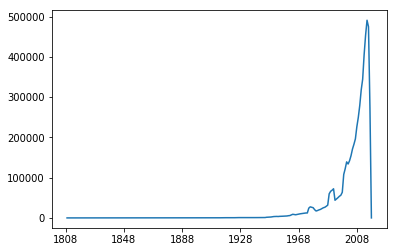

In [46]:

zz = [(x, y) for x, y in year_counts.items()]
zz.sort(key=lambda z: z[0])

x = [datetime.datetime(x[0], 1, 1, 0, 0) for x in zz ]
y = [x[1] for x in zz ]

# x = np.array(list(year_counts.keys()))
# x = np.array([datetime.datetime(i, 1, 1, 0, 0) for i in year_counts.keys()])
# y = np.array(list(year_counts.values()))

plt.plot(x, y)
plt.show()